# ROC (Receiver Operating Characteristic) 곡선

---

## 분류 모델 성능 평가

- 분류 모델 성능 시각화에 널리 사용


---

## ROC 곡선 해석

- 가로축: False Positive Rate
- 세로축: True Positive Rate  
- 왼쪽 상단에 가까울수록 모델 성능 좋음
- 대각선에 가까우면 무작위 예측 수준

---

## True Positive Rate vs False Positive Rate 

- True Positive Rate: 실제 긍정을 긍정으로 예측한 비율
- False Positive Rate: 실제 부정을 긍정으로 잘못 예측한 비율
- 상충 관계 시각화

---

## AUC (Area Under the Curve)

- ROC 곡선 아래 면적 (0 ~ 1)
- 1에 가까울수록 모델 성능 우수
- 0.5는 무작위 예측과 동일

---  

## 임계값 조정

- False Positive와 True Positive 사이의 균형 조절 가능
    - threshold(클래스를 예측할 때 사용하는 결정 임계값)이 변화함에 따라 FPR과 TPR이 어떻게 변화하는지를 시각화. 어떤 threshold 값에서 모델의 성능이 좋은지를 파악할 수 있다.
- 예: 스팸 메일 탐지. FP 줄이기 위해 임계값 높이면 TP도 낮아짐.
  - trade off를 roc 곡선을 통해 시각화하고 조정할 수 있다.
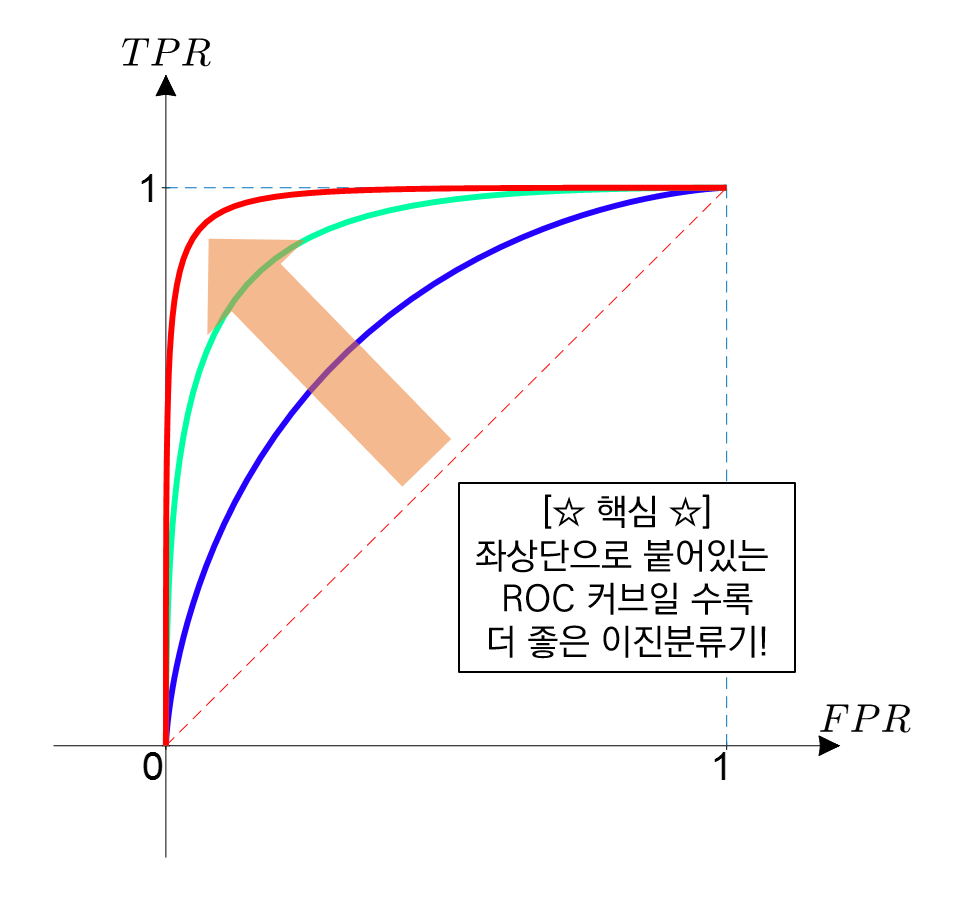

In [10]:
# 우리 분류 모델에 사용했으면 좋았을듯
import pandas as pd
from sklearn import datasets

# 유방암 데이터셋 로드
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns = data.feature_names)

# 1이면 양성 종양, 0이면 악성 종양 라벨 컬럼 지정
df['target'] = data.target

In [11]:
from sklearn.model_selection import train_test_split

# train, test 셋 분리
X = df.iloc[:, :-1] # target column을 제외한 모든 column을 feature로 사용
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [12]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
y_score = model.predict(X_test) # 테스트 데이터셋에 대한 예측 값

# 앞 5개 값 출력 예시
print(y_score[:5])

[0.62168355 0.17803853 0.27512068 1.1320503  1.11698318]


## 1. sklearn 패키지로 roc curve 계산, 시각화

In [17]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_score)
print(fpr, tpr, thresholds)

[0.         0.         0.         0.02325581 0.02325581 0.04651163
 0.04651163 0.06976744 0.06976744 0.23255814 0.23255814 1.        ] [0.         0.01408451 0.88732394 0.88732394 0.92957746 0.92957746
 0.95774648 0.95774648 0.98591549 0.98591549 1.         1.        ] [ 2.41615414  1.41615414  0.65587474  0.65041677  0.59037896  0.58575204
  0.56621261  0.55847881  0.55160057  0.3191878   0.28085763 -0.66303713]


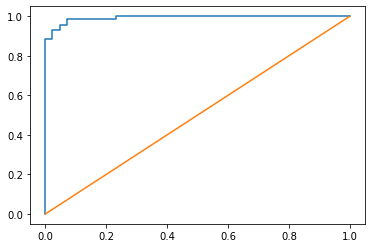

In [32]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, [0,1], [0,1])
plt.show()

## 2. AUC 면적 계산

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_score)

0.9924664264657714

## 3. 최적의 threshold 탐색


In [94]:
idx = np.argmax(tpr - fpr)
thresholds[idx]

2.416154144494606

In [95]:
idx = np.argmax(fpr - tpr)
thresholds[idx]

2.416154144494606

In [70]:
import numpy as np
aa = list()
for fp, tp in zip(fpr, tpr):
    a = tp - fp
    aa.append(a)

In [74]:
idx = aa.index(max(aa))
b_thres = thresholds[idx]

In [93]:
# fpr: 틀린데 (y_test가 i보다 낮은데) 맞았다고 (y_score가 i보다 큼)판단
len((y_test<0.9)&(y_score>0.9))/len(y_score)
# tpr: 맞은데 맞았다고 판단
# len((y_test>0.9)&(y_score>0.9))/len(y_score)

1.0

In [97]:
max(y_score)

1.4161541444946064

In [91]:
lst= []
for i in np.linspace(0, 1, 3000):
    fpr = len((y_test<i)&(y_score>i))/len(y_score)
    tpr = len((y_test>i)&(y_score>i))/len(y_score)
    print(tpr - fpr)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
